In [5]:
# Si alguna librería no está instalada en Colab (normalmente TensorFlow viene preinstalado)
# Puedes instalarla así (descomenta la siguiente línea si hace falta):
# !pip install tensorflow pandas matplotlib

# Importar las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importar Keras desde TensorFlow para crear redes neuronales
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


ModuleNotFoundError: No module named 'tensorflow'

✅ Estamos preparando las "herramientas" que vamos a usar.
✅ tensorflow.keras nos va a permitir crear la red neuronal "como con bloques de lego".
✅ pandas nos ayuda a leer los datos (que luego la red aprenderá).
✅ matplotlib sirve para dibujar los resultados.


Ejemplo de una fila de datos:

Largo sépalo	Ancho sépalo	Largo pétalo	Ancho pétalo	Tipo de flor


Las especies de flores están codificadas con números para que la red las pueda aprender:

0 → Iris Setosa

1 → Iris Versicolor

2 → Iris Virginica

In [ ]:
# Importamos librerías necesarias
from sklearn.datasets import load_iris  # para cargar el dataset
from sklearn.model_selection import train_test_split  # para dividir los datos
from sklearn.preprocessing import StandardScaler  # para normalizar

# Cargar el dataset de Iris
iris = load_iris()

# X → las características de cada flor (input)
X = iris.data  # (150, 4)  # 150 ejemplos, 4 características

# y → la especie de la flor (output)
# y son etiquetas 0, 1 o 2 que representan las 3 especies de flor
y = iris.target  # (150,) → vector de 150 elementos

# Normalizamos las características para que estén en una escala similar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividimos los datos:
# - 80% para entrenar (X_train, y_train)
# - 20% para probar (X_test, y_test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Verificamos la forma de los datos
print("X_train shape:", X_train.shape)  # (120, 4)
print("y_train shape:", y_train.shape)  # (120,)
print("X_test shape:", X_test.shape)    # (30, 4)
print("y_test shape:", y_test.shape)    # (30,)


X_train shape: (120, 4)
y_train shape: (120,)
X_test shape: (30, 4)
y_test shape: (30,)


✅ Cargamos un dataset de flores.
✅ Cada flor tiene 4 números (sus medidas).
✅ La especie de la flor está representada por un número (0, 1 o 2).
✅ Ajustamos los números (normalización).
✅ Separamos en datos para que la red aprenda y para que luego podamos probarla.

ANN significa Artificial Neural Network → en español: Red Neuronal Artificial.

📌 Es un modelo de computador que imita el cerebro humano:

Aprende a partir de ejemplos.

Encuentra patrones en los datos.

Sirve para clasificar cosas, predecir valores, reconocer imágenes, etc.

¿Qué es una entrada en una ANN?
Una entrada es simplemente un número que le damos a la red.
En nuestro caso (flores Iris), cada flor tiene 4 números:

Largo del sépalo

Ancho del sépalo

Largo del pétalo

Ancho del pétalo

👉 Cada flor es un "ejemplo", con 4 números = 4 entradas.

In [ ]:
#Entradas (4 números) → Capa oculta (neuronas) → Capa oculta (neuronas) → Capa de salida (resultado: flor 0, 1 o 2)


¿Qué son las neuronas?
Cada neurona toma las entradas y hace un cálculo:

"¿Si el pétalo es largo y el sépalo ancho... podría ser Iris Virginica?"

Cada capa tiene muchas neuronas, para aprender combinaciones complejas.

 ¿Qué red vamos a crear?
✅ 4 entradas (porque cada flor tiene 4 números)
✅ 2 capas ocultas (porque queremos que aprenda cosas un poco complejas)
✅ Primera capa oculta → 10 neuronas
✅ Segunda capa oculta → 8 neuronas
✅ 1 capa de salida → 3 neuronas (una por cada tipo de flor: 0, 1 o 2)

In [ ]:
# Definir la red neuronal
# Usamos Sequential para una red sencilla

model = keras.Sequential([
    # Capa de entrada y primera capa oculta
    layers.Dense(10, activation='relu', input_shape=(4,)),

    # Segunda capa oculta
    layers.Dense(8, activation='relu'),

    # Capa de salida (3 neuronas, porque tenemos 3 clases: 0,1,2)
    layers.Dense(3, activation='softmax')
])

# Resumen del modelo (opcional, solo para ver cómo quedó)
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165 (660.00 B)

 Trainable params: 165 (660.00 B)

 Non-trainable params: 0 (0.00 B)

✅ layers.Dense(10, activation='relu')
→ Crea una capa con 10 neuronas y función relu, que ayuda a aprender relaciones no lineales.

✅ input_shape=(4,)
→ La red sabe que cada flor tiene 4 características (largo sépalo, ancho sépalo, largo pétalo, ancho pétalo).

✅ layers.Dense(8, activation='relu')
→ Segunda capa oculta con 8 neuronas.

✅ layers.Dense(3, activation='softmax')
→ Capa de salida con 3 neuronas (una para cada especie de flor).
→ softmax hace que la red devuelva "probabilidades" de cada clase (cuál es más probable).

¿Qué significa "compilar" la red?
👉 Es como decirle a la red cómo va a aprender.

Cuando compilas una red, le indicas 3 cosas:

Optimizador → cómo va a ajustar sus pesos (cómo "mejora").
➡️ Usaremos adam (funciona muy bien).

Función de pérdida (loss) → cómo mide qué tan mal se está equivocando.
➡️ Usaremos sparse_categorical_crossentropy porque tenemos 3 clases (0,1,2).

Métrica de evaluación → cómo medimos qué tan bien está funcionando.
➡️ Usaremos accuracy (qué porcentaje de flores clasifica bien).

In [ ]:
# Compilar la red (definir cómo va a aprender)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


¿Qué significa "entrenar" la red?
✅ Es darle los ejemplos (flores), para que aprenda.

Cada vez que la red ve TODOS los datos de entrenamiento, eso se llama 1 época (epoch).

👉 Le diremos que repita varias épocas (por ejemplo, 50) para que practique muchas veces.

In [ ]:
# Entrenar la red con nuestros datos
# epochs=50 → le decimos que pase 50 veces por los datos
# batch_size=8 → cada vez procesa 8 flores juntas

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_data=(X_test, y_test),  # para ver cómo se comporta en los datos nuevos
    verbose=1  # mostrar el progreso en la pantalla
)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.2329 - loss: 1.0849 - val_accuracy: 0.3667 - val_loss: 1.0186
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2123 - loss: 1.0616 - val_accuracy: 0.4333 - val_loss: 0.9871
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3413 - loss: 1.0162 - val_accuracy: 0.4667 - val_loss: 0.9545
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3248 - loss: 1.0160 - val_accuracy: 0.5000 - val_loss: 0.9248
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4556 - loss: 0.9967 - val_accuracy: 0.5000 - val_loss: 0.8924
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4549 - loss: 0.9298 - val_accuracy: 0.4333 - val_loss: 0.8588
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4455 - loss: 0.8831 - val_accuracy: 0.4000 - val_loss: 0.8247
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4148 - loss: 0.9075 - val_accuracy: 0.5333 - val_loss

✅ compile → configuramos cómo aprende.
✅ fit → entrenamos la red, es como pasarle un montón de ejemplos para que practique.
✅ epochs → número de veces que repite todo el proceso (cuanto más, más aprende... pero cuidado con que no se sobreentrene).
✅ batch_size → cuántos ejemplos ve de una vez (como el tamaño de "bocados").

¿Cómo saber si la red aprendió?
👉 Cuando entrenamos la red (fit), ella guarda en history:

Cuánto acertó (accuracy) en cada ronda (epoch).

Qué tanto se equivocó (loss).

👉 Podemos graficarlo para ver si va aprendiendo.

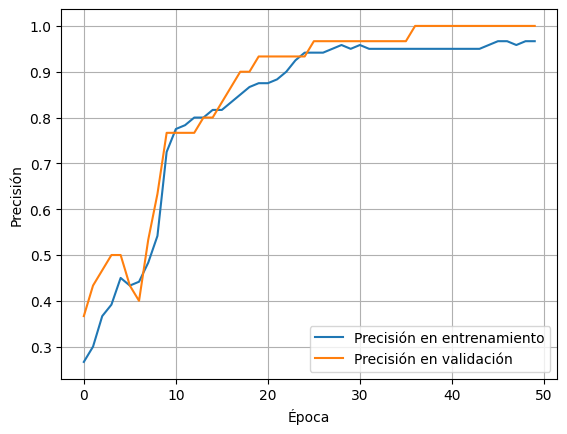

In [ ]:
# Importamos librería para graficar
import matplotlib.pyplot as plt

# Graficamos la precisión (accuracy) en el entrenamiento y en la validación
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid()
plt.show()


✅ Si las curvas suben → la red está aprendiendo.
✅ Si "accuracy" se queda bajo → la red no aprende bien.
✅ Si en entrenamiento acierta mucho pero en validación no → se sobreentrenó.

¿Cómo usar la red para predecir flores nuevas?
👉 Le damos las medidas de una flor, y ella nos dice qué flor cree que es.

In [ ]:
import numpy as np

# Tomamos una flor del conjunto de prueba
# X_test es un conjunto de flores que NO usamos para entrenar
# Cada flor en X_test es un arreglo de 4 números (los 4 datos de la flor)
# Aquí estamos tomando la primera flor de ese conjunto de prueba
ejemplo = X_test[0]
print("Datos de la flor (4 números):", ejemplo)

# reshape(1, -1) cambia la forma del arreglo
# El modelo espera que le pasemos un conjunto de flores (aunque sea de 1 flor)
# Si dejamos ejemplo = [4 números], el modelo no acepta
# reshape(1, -1) convierte los 4 números en un arreglo de "1 fila, 4 columnas"
# Es decir, se transforma en: [[n1, n2, n3, n4]]
ejemplo = ejemplo.reshape(1, -1)

# Ahora sí, el modelo puede hacer la predicción
prediccion = model.predict(ejemplo)

# El modelo devuelve una lista con 3 números
# Cada número es la "probabilidad" que la flor sea cada tipo:
# posición 0: Setosa (clase 0)
# posición 1: Versicolor (clase 1)
# posición 2: Virginica (clase 2)
print("Probabilidades por tipo de flor (Setosa=0, Versicolor=1, Virginica=2):")
print(prediccion[0])

# np.argmax(prediccion[0]) devuelve el índice del valor más alto
# Es decir, cuál tipo de flor predice el modelo (0, 1 o 2)
clase_predicha = np.argmax(prediccion[0])
print("Clase predicha por la red:", clase_predicha)

# Por último, mostramos cuál era la clase real de esta flor (que conocemos)
print("Clase real:", y_test[0])


Datos de la flor (4 números): [ 0.31099753 -0.59237301  0.53540856  0.00087755]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Probabilidades por tipo de flor (Setosa=0, Versicolor=1, Virginica=2):
[0.00568481 0.9170282  0.07728703]
Clase predicha por la red: 1
Clase real: 1


###Resumen:

ejemplo = X_test[0] → estamos tomando una flor que el modelo nunca vio.

reshape(1, -1) → el modelo espera recibir un conjunto de flores, aunque sea solo 1 flor. Reshape convierte la flor en el formato correcto.

model.predict(ejemplo) → la red calcula la probabilidad de que sea cada tipo de flor.

np.argmax(prediccion[0]) → vemos cuál es la clase con más probabilidad (la que la red predice).

y_test[0] → comparamos con la respuesta real.

Predicciones: Cada flor tiene 4 datos:

Largo del sépalo (cm)

Ancho del sépalo (cm)

Largo del pétalo (cm)

Ancho del pétalo (cm)

In [ ]:
import numpy as np

# Escribe los 4 números de la flor que quieres predecir
# Cambia estos valores para probar distintas flores
mi_flor = np.array([[6.1, 2.8, 4.7, 1.2]])

# Si normalizaste los datos en X_train con StandardScaler,
# también debes normalizar aquí:
mi_flor_normalizada = scaler.transform(mi_flor)

# Ahora hacemos la predicción
prediccion = model.predict(mi_flor_normalizada)

# Mostramos las probabilidades por tipo de flor
print("Probabilidades por tipo de flor (Setosa=0, Versicolor=1, Virginica=2):")
print(prediccion[0])

# Clase predicha (índice de la mayor probabilidad)
clase_predicha = np.argmax(prediccion[0])
print("Clase predicha por la red:", clase_predicha)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Probabilidades por tipo de flor (Setosa=0, Versicolor=1, Virginica=2):
[0.00568481 0.9170282  0.07728703]
Clase predicha por la red: 1


###EXplicación:

mi_flor: EScriba los 4 números de la flor que quiere predecir.

scaler.transform(): como los datos fueron normalizados para entrenar la red, es necesario normalizar los nuevos datos de igual forma.

model.predict(): la red calcula las probabilidades.

np.argmax(): muestra qué clase predice (0 = Setosa, 1 = Versicolor, 2 = Virginica).